In [595]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [596]:
colors = plt.get_cmap('hsv', 10)

###Data from Customer.csv

In [597]:
df_customers = pd.read_csv("https://raw.githubusercontent.com/Vignesh-ViggyPiggy/Data-Science-Assignment-eCommerce-Transactions-Dataset/refs/heads/main/Customers.csv")
df_customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


###Data from Transactions.csv

In [598]:
df_transactions = pd.read_csv("https://raw.githubusercontent.com/Vignesh-ViggyPiggy/Data-Science-Assignment-eCommerce-Transactions-Dataset/refs/heads/main/Transactions.csv")
df_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


###Merging the datasets using inner join on CustomerID

In [599]:
df = pd.merge(df_transactions,df_customers,on = "CustomerID",how="inner" )
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


###Information of the features of the dataset

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


###Calculating customer tenure using sign up date and transaction date

customer tenure describes the time the customer used the establishment by finding the difference of SignupDate and TransactionDate. Customers with a negative difference are treated as new customers with their tenure set to 0.

In [601]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['CustomerTenure'] = (df['TransactionDate'] - df['SignupDate']).dt.days
df['CustomerTenure'] = df['CustomerTenure'].apply(lambda x: x if x >= 0 else 0)
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,CustomerTenure
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,631
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,0
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,21
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,0
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,737
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,1006
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,58
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,0
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,0


###Selecting the essential features and standardization


In [602]:
features = df[["Quantity", "TotalValue", "Price", "CustomerTenure"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

###Plotting elbow method graph

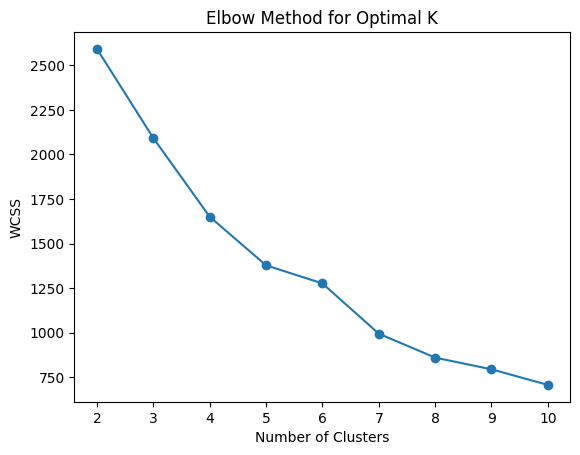

In [603]:
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

###Inference:
* Based on the plot, no. of clusters K = 5 or K = 6 is the optimal number of clusters for the dataset.

* WCSS measures the sum of squared distances between each data point and the centroid of its cluster.

###Calculating DB Index and Silhouette Score

for no. of clusters = 2...10 the scores are calculated

In [604]:
for optimal_k in range(2,11):
  kmeans = KMeans(n_clusters=optimal_k, random_state=42)
  kmeans_labels = kmeans.fit_predict(features_scaled)

  db_index_kmeans = davies_bouldin_score(features_scaled, kmeans_labels)
  silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)

  print(f"K-Means - Clusters: {optimal_k}, DB Index: {db_index_kmeans:.3f}, Silhouette Score: {silhouette_kmeans:.3f}")

K-Means - Clusters: 2, DB Index: 1.256, Silhouette Score: 0.316
K-Means - Clusters: 3, DB Index: 1.379, Silhouette Score: 0.286
K-Means - Clusters: 4, DB Index: 1.099, Silhouette Score: 0.305
K-Means - Clusters: 5, DB Index: 1.120, Silhouette Score: 0.301
K-Means - Clusters: 6, DB Index: 1.123, Silhouette Score: 0.277
K-Means - Clusters: 7, DB Index: 1.036, Silhouette Score: 0.325
K-Means - Clusters: 8, DB Index: 1.007, Silhouette Score: 0.331
K-Means - Clusters: 9, DB Index: 0.976, Silhouette Score: 0.328
K-Means - Clusters: 10, DB Index: 0.978, Silhouette Score: 0.329


###Inference:
* 9 clusters gives ideal DB Index which describes inter cluster distance and silhouette score that describes comapactness and seperation of clusters

In [605]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

###Plot of K-means clustering with 9 clusters

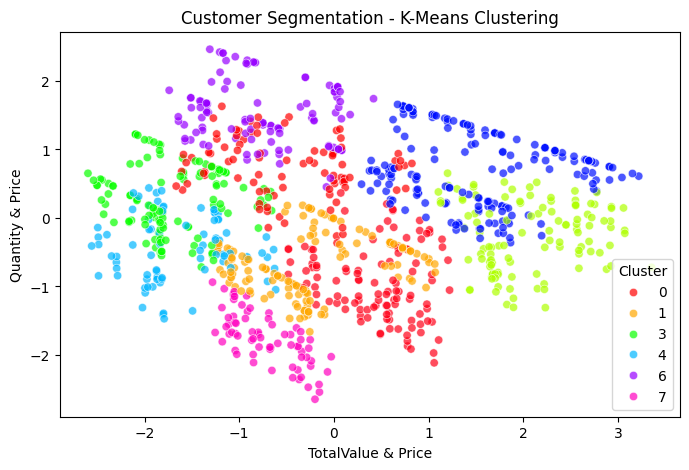

In [606]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

loadings = pca.components_
feature_names = features.columns

top_features_pc1 = np.abs(loadings[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names[top_features_pc1])
pc2_label = " & ".join(feature_names[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])

df_visual["KMeans_Cluster"] = kmeans_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="KMeans_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - K-Means Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

In [607]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

###Plot of k-means clustering with 5 clusters

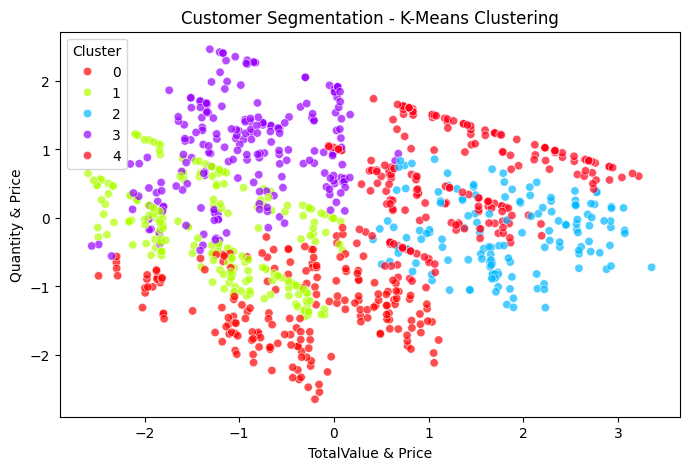

In [608]:


df_visual["KMeans_Cluster"] = kmeans_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="KMeans_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - K-Means Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()


###Seperate Plot of each of the 5 clusters

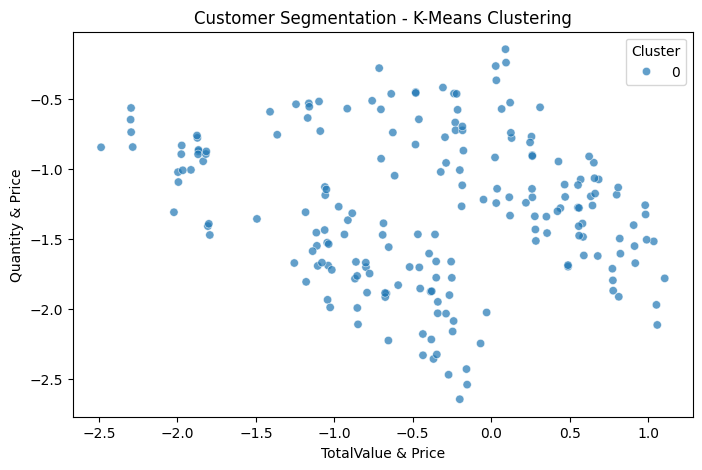

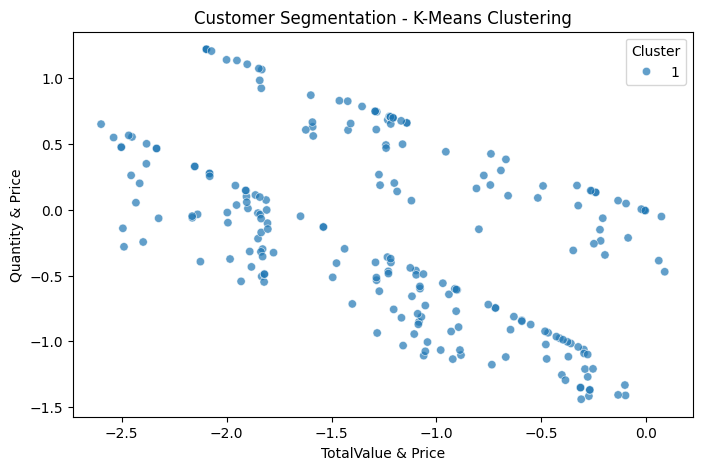

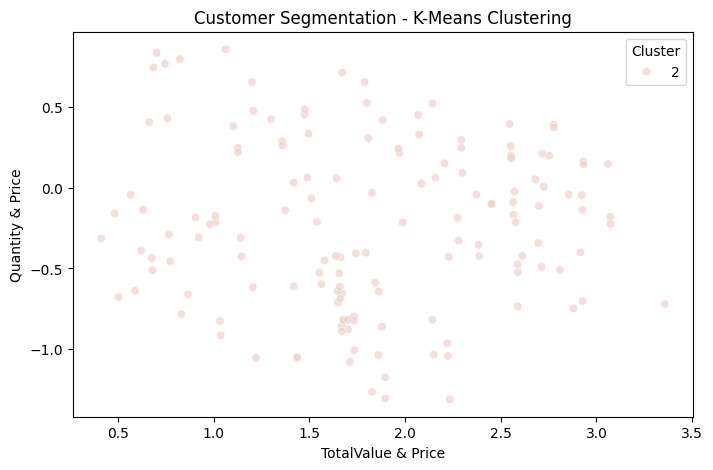

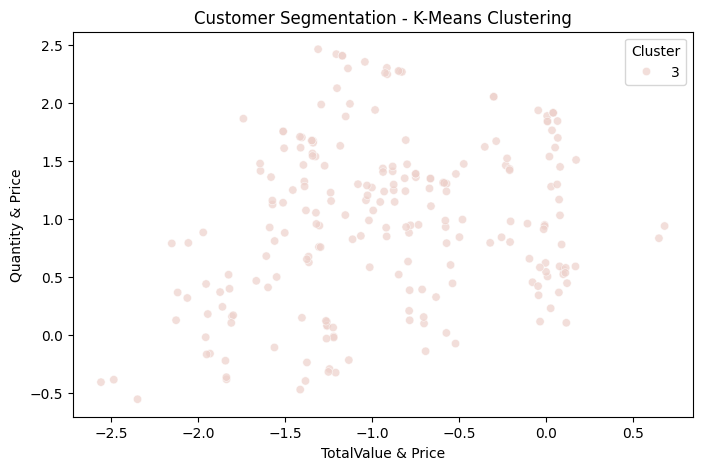

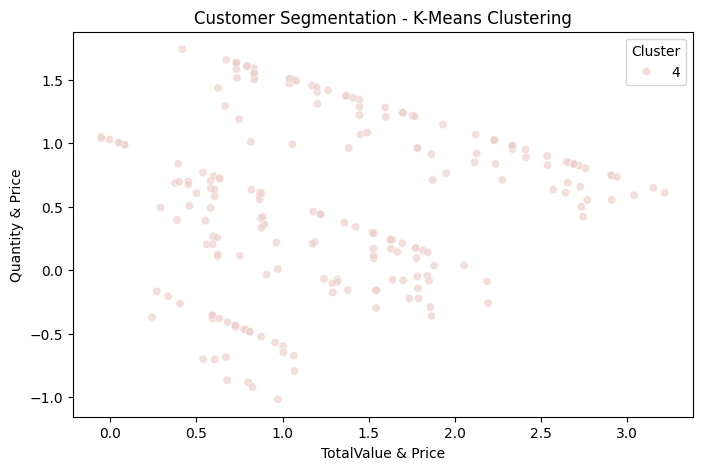

In [609]:

for i in range(5):
  df_visual_selected = df_visual[df_visual["KMeans_Cluster"]==i]
  plt.figure(figsize=(8, 5))
  sns.scatterplot(data=df_visual_selected, x=pc1_label, y=pc2_label, hue="KMeans_Cluster", alpha=0.7)
  plt.title("Customer Segmentation - K-Means Clustering")
  plt.xlabel(pc1_label)
  plt.ylabel(pc2_label)
  plt.legend(title="Cluster")
  plt.show()


###Creating another dataset of the initial features along with recency and transaction_frequency

* recency describes the most recent transaction of a customer and transaction_frequency describes the no. of transaction by a customer. These features are added with the initial features and stored in another variable.

* Now this dataset will be referred to as 'dataset2' and initial dataset as 'dataset'

In [610]:
transaction_frequency = df.groupby("CustomerID")["TransactionID"].nunique().reset_index()
transaction_frequency.rename(columns={"TransactionID": "TransactionFrequency"}, inplace=True)

latest_date = df["TransactionDate"].max()
recency = df.groupby("CustomerID")["TransactionDate"].max().reset_index()
recency["Recency"] = (latest_date - recency["TransactionDate"]).dt.days
customer_features = df.merge(transaction_frequency, on="CustomerID")
customer_features = customer_features.merge(recency, on="CustomerID")
customer_features = customer_features.drop("TransactionDate_y",axis=1)
customer_features = customer_features.rename(columns={"TransactionDate_x":"TransactionDate"})
customer_features[customer_features['CustomerID']=="C0001"]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,CustomerTenure,TransactionFrequency,Recency
135,T00015,C0001,P054,2024-01-19 03:12:55,2,114.60,57.30,Lawrence Carroll,South America,2022-07-10,558,5,55
442,T00932,C0001,P022,2024-09-17 09:01:18,3,412.62,137.54,Lawrence Carroll,South America,2022-07-10,800,5,55
546,T00085,C0001,P096,2024-04-08 00:01:00,2,614.94,307.47,Lawrence Carroll,South America,2022-07-10,638,5,55
724,T00445,C0001,P083,2024-05-07 03:11:44,2,911.44,455.72,Lawrence Carroll,South America,2022-07-10,667,5,55
776,T00436,C0001,P029,2024-11-02 17:04:16,3,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,846,5,55


###Feature Selection and Standardization

In [611]:
features2 = customer_features[["Quantity", "TotalValue", "Price", "CustomerTenure","TransactionFrequency","Recency"]]
scaler2 = StandardScaler()
features_scaled2 = scaler2.fit_transform(features2)

###Elbow method Plot

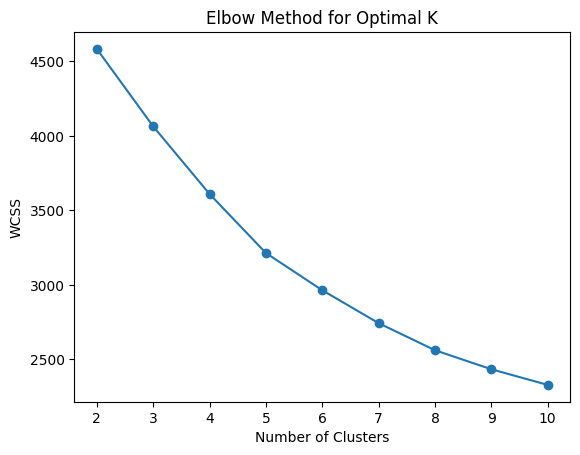

In [612]:
wcss2 = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled2)
    wcss2.append(kmeans.inertia_)

plt.plot(K_range, wcss2, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

###Calculating DB Index and Silhouette Score

calculated for clusters = 2...10



In [613]:
for optimal_k in range(2,11):
  kmeans = KMeans(n_clusters=optimal_k, random_state=42)
  kmeans_labels2 = kmeans.fit_predict(features_scaled2)

  db_index_kmeans = davies_bouldin_score(features_scaled2, kmeans_labels2)
  silhouette_kmeans = silhouette_score(features_scaled2, kmeans_labels2)

  print(f"K-Means - Clusters: {optimal_k}, DB Index: {db_index_kmeans:.3f}, Silhouette Score: {silhouette_kmeans:.3f}")

K-Means - Clusters: 2, DB Index: 1.677, Silhouette Score: 0.223
K-Means - Clusters: 3, DB Index: 1.849, Silhouette Score: 0.186
K-Means - Clusters: 4, DB Index: 1.642, Silhouette Score: 0.194
K-Means - Clusters: 5, DB Index: 1.453, Silhouette Score: 0.192
K-Means - Clusters: 6, DB Index: 1.505, Silhouette Score: 0.186
K-Means - Clusters: 7, DB Index: 1.540, Silhouette Score: 0.178
K-Means - Clusters: 8, DB Index: 1.502, Silhouette Score: 0.183
K-Means - Clusters: 9, DB Index: 1.471, Silhouette Score: 0.183
K-Means - Clusters: 10, DB Index: 1.491, Silhouette Score: 0.179


###ideal clusters = 5 with ideal DB Index and Silhouette score

In [614]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

###Plot of K-means clustering of dataset2

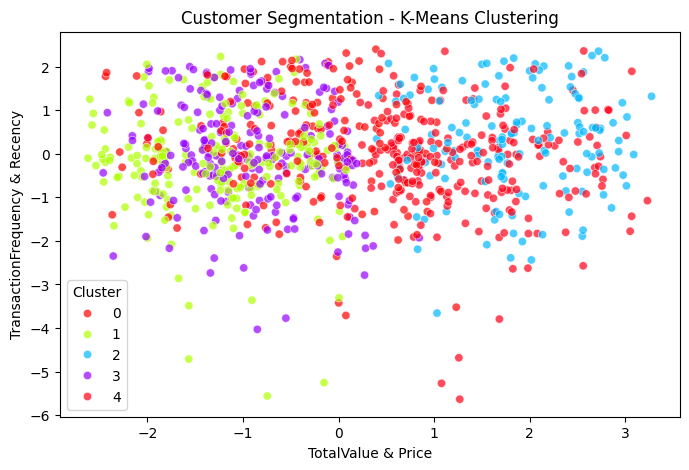

In [615]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled2)

loadings2 = pca.components_
feature_names2 = features2.columns

top_features_pc1 = np.abs(loadings2[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings2[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names2[top_features_pc1])
pc2_label = " & ".join(feature_names2[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])
df_visual["KMeans_Cluster"] = kmeans_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="KMeans_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - K-Means Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

###Performing DBScan on dataset

In [616]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

valid_clusters = dbscan_labels[dbscan_labels != -1]

if len(set(valid_clusters)) > 1:
    db_index_dbscan = davies_bouldin_score(features_scaled[dbscan_labels != -1], valid_clusters)
    silhouette_dbscan = silhouette_score(features_scaled[dbscan_labels != -1], valid_clusters)
else:
    db_index_dbscan = "Not Applicable"
    silhouette_dbscan = "Not Applicable"

print(f"DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, DB Index: {db_index_dbscan}, Silhouette Score: {silhouette_dbscan}")

DBSCAN - Clusters: 5, DB Index: 2.3490872977599864, Silhouette Score: 0.07448340912155678


In [617]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

loadings = pca.components_
feature_names = features.columns

top_features_pc1 = np.abs(loadings[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names[top_features_pc1])
pc2_label = " & ".join(feature_names[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])


###Plot of DBScan on dataset

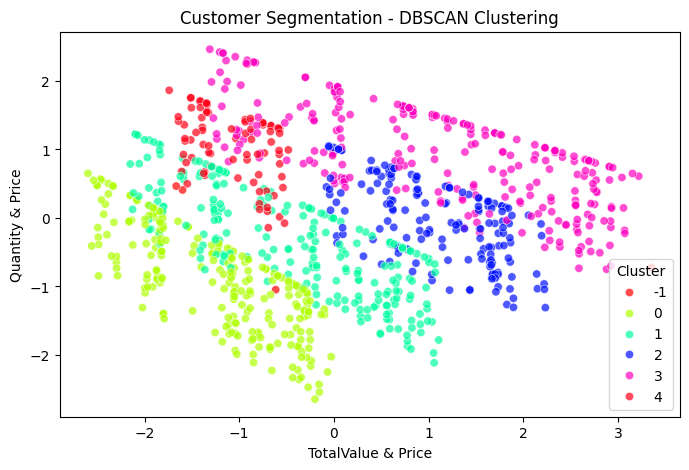

In [618]:
df_visual["DBSCAN_Cluster"] = dbscan_labels
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="DBSCAN_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - DBSCAN Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

###Performing DBScan on dataset2

In [619]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled2)

valid_clusters = dbscan_labels[dbscan_labels != -1]

if len(set(valid_clusters)) > 1:
    db_index_dbscan = davies_bouldin_score(features_scaled2[dbscan_labels != -1], valid_clusters)
    silhouette_dbscan = silhouette_score(features_scaled2[dbscan_labels != -1], valid_clusters)
else:
    db_index_dbscan = "Not Applicable"
    silhouette_dbscan = "Not Applicable"

print(f"DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, DB Index: {db_index_dbscan}, Silhouette Score: {silhouette_dbscan}")

DBSCAN - Clusters: 8, DB Index: 0.4474516485359886, Silhouette Score: 0.6535323347524681


In [620]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled2)

loadings2 = pca.components_
feature_names2 = features2.columns

top_features_pc1 = np.abs(loadings2[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings2[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names2[top_features_pc1])
pc2_label = " & ".join(feature_names2[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])


###Plot of DBScan on dataset2

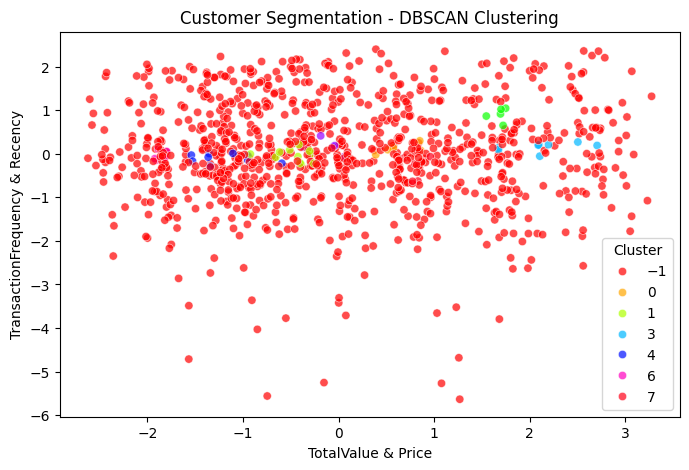

,TotalValue & Price,TransactionFrequency & Recency,DBSCAN_Cluster
0,-1.014040,-0.541492,-1
1,-1.100674,-0.295420,-1
2,-1.042994,-0.757905,-1
3,-0.224115,-0.482836,-1
4,0.684133,-0.619901,-1
...,...,...,...
995,-0.273271,1.130345,-1
996,1.836750,0.550326,-1
997,3.065415,-1.436221,-1
998,0.819568,-0.425261,-1


In [621]:
df_visual["DBSCAN_Cluster"] = dbscan_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="DBSCAN_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - DBSCAN Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()
df_visual

###Plot of DBScan on dataset2 after removing the -1 cluster

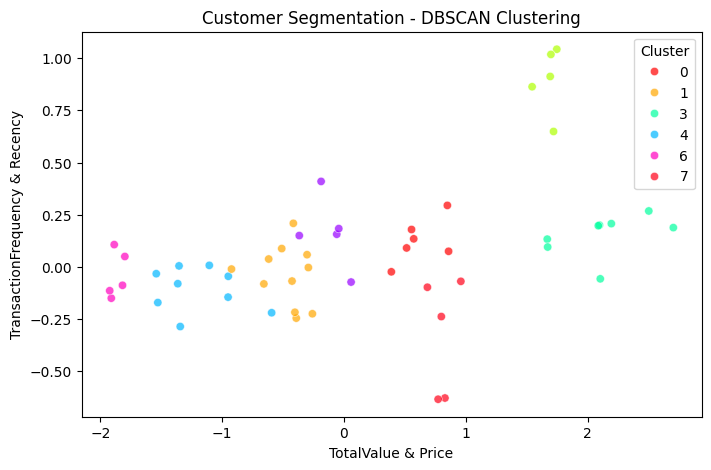

In [622]:
df_visual["DBSCAN_Cluster"] = dbscan_labels
df_visual_without = df_visual[df_visual["DBSCAN_Cluster"]!=-1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual_without, x=pc1_label, y=pc2_label, hue="DBSCAN_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - DBSCAN Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

###Hierarchical Clustering on dataset

###Calculating DB Index and Silhouette score for clusters of range 2...10

In [623]:
for optimal_k in range(2,11):
  agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
  agg_labels = agg_clustering.fit_predict(features_scaled)

  db_index_agg = davies_bouldin_score(features_scaled, agg_labels)
  silhouette_agg = silhouette_score(features_scaled, agg_labels)

  print(f"Hierarchical - Clusters: {optimal_k}, DB Index: {db_index_agg:.3f}, Silhouette Score: {silhouette_agg:.3f}")

Hierarchical - Clusters: 2, DB Index: 1.235, Silhouette Score: 0.297
Hierarchical - Clusters: 3, DB Index: 1.289, Silhouette Score: 0.289
Hierarchical - Clusters: 4, DB Index: 1.211, Silhouette Score: 0.273
Hierarchical - Clusters: 5, DB Index: 1.248, Silhouette Score: 0.250
Hierarchical - Clusters: 6, DB Index: 1.221, Silhouette Score: 0.264
Hierarchical - Clusters: 7, DB Index: 1.103, Silhouette Score: 0.275
Hierarchical - Clusters: 8, DB Index: 1.024, Silhouette Score: 0.273
Hierarchical - Clusters: 9, DB Index: 1.018, Silhouette Score: 0.289
Hierarchical - Clusters: 10, DB Index: 1.020, Silhouette Score: 0.282


###9 cluster is chosen for ideal values

In [624]:
optimal_k=9
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)


###Principle Component Analysis

In [625]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

loadings = pca.components_
feature_names = features.columns

top_features_pc1 = np.abs(loadings[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names[top_features_pc1])
pc2_label = " & ".join(feature_names[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])

###plot of hierarchical clustering on dataset

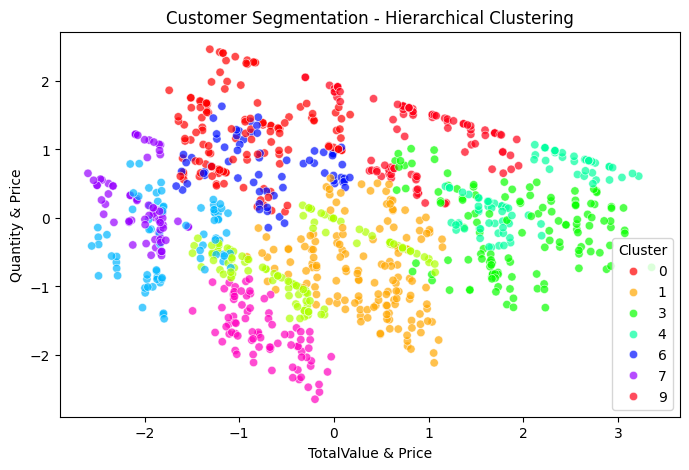

In [626]:
df_visual["Hierarchical_Cluster"] = agg_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="Hierarchical_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - Hierarchical Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

###plotting each cluster seperately

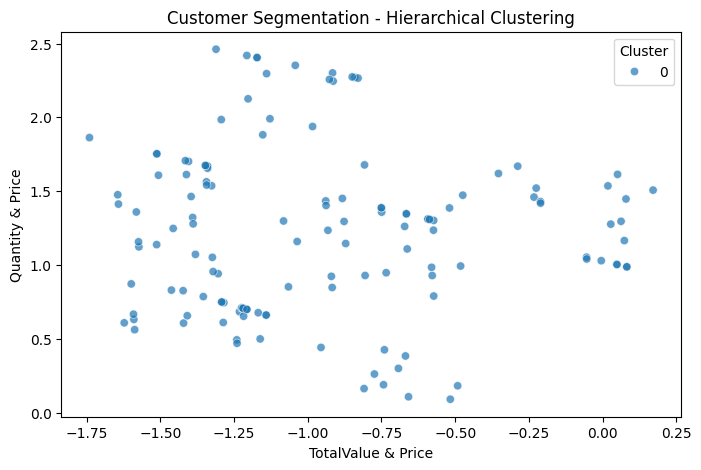

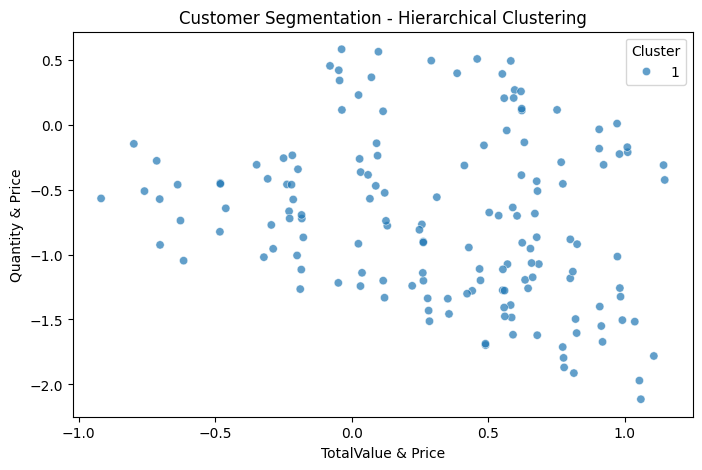

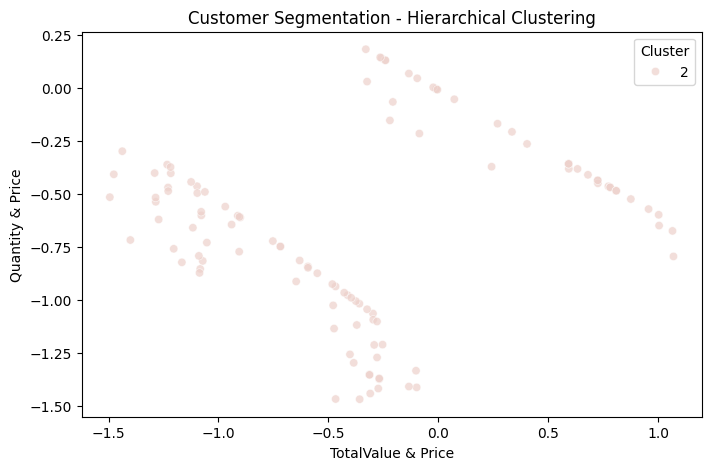

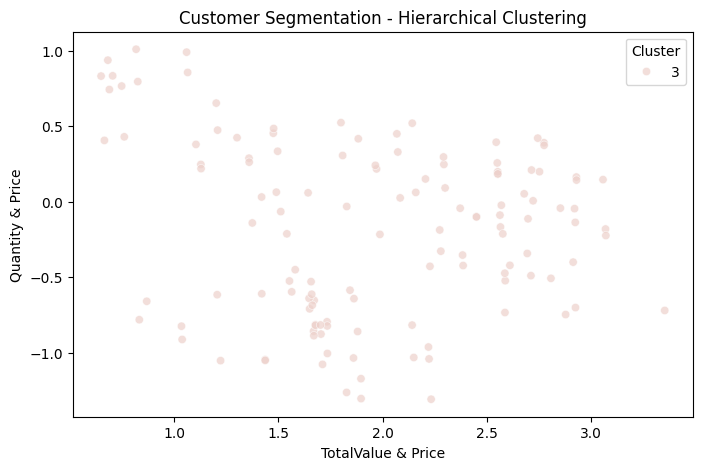

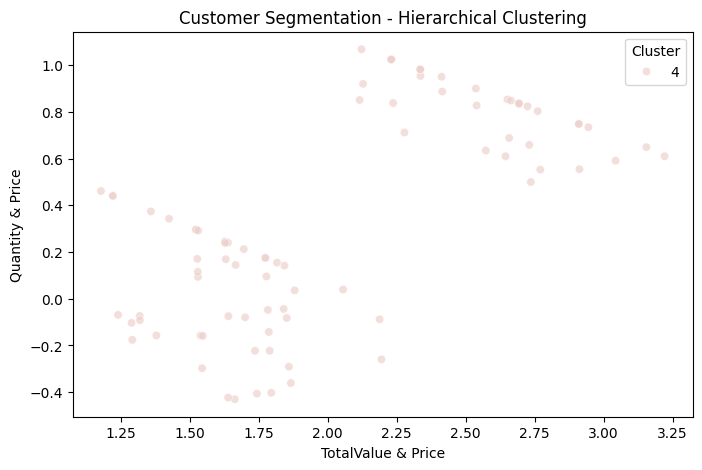

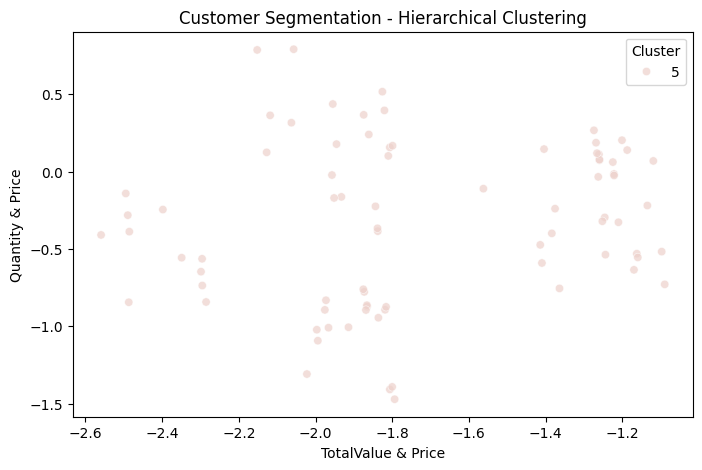

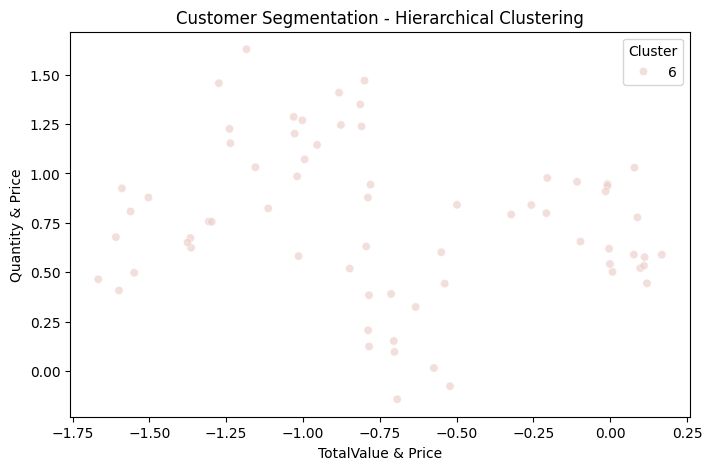

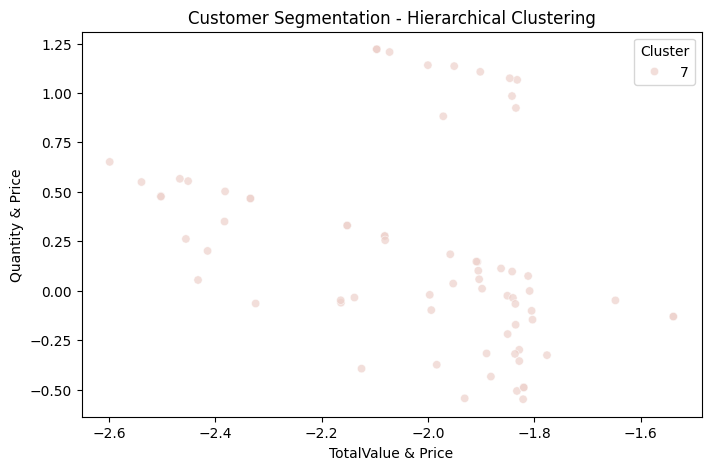

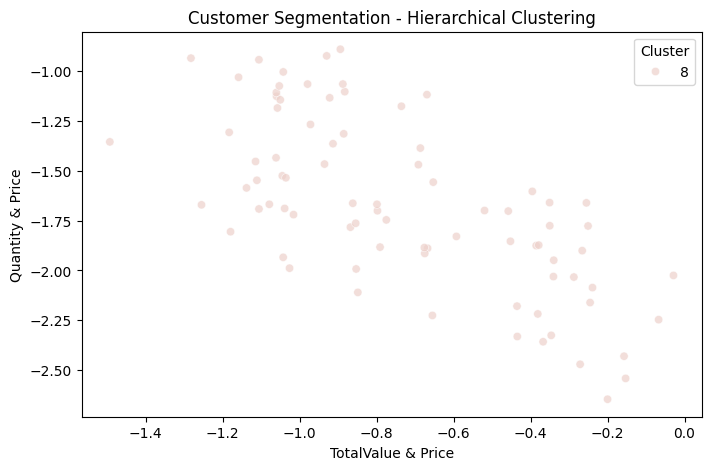

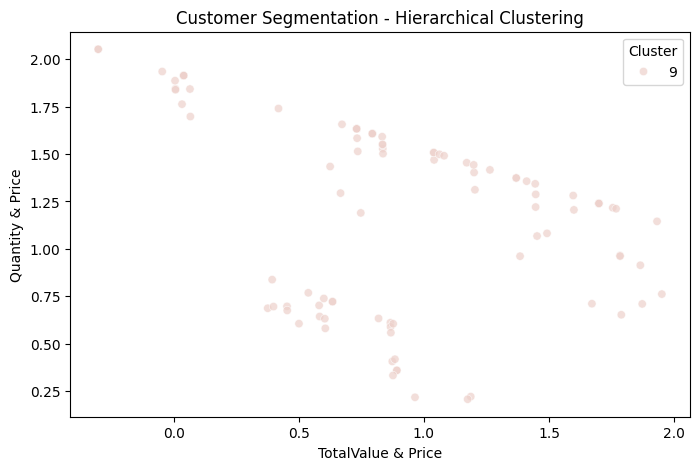

In [627]:
for i in range(10):
  df_visual["Hierarchical_Cluster"] = agg_labels
  df_selected = df_visual[df_visual["Hierarchical_Cluster"]==i]
  plt.figure(figsize=(8, 5))
  sns.scatterplot(data=df_selected, x=pc1_label, y=pc2_label, hue="Hierarchical_Cluster", alpha=0.7)
  plt.title("Customer Segmentation - Hierarchical Clustering")
  plt.xlabel(pc1_label)
  plt.ylabel(pc2_label)
  plt.legend(title="Cluster")
  plt.show()

###Hierarchical Clustering on dataset2

###Calculating DB Index and Silhouette score for clusters of range 2...10

In [628]:
for optimal_k in range(2,11):
  agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
  agg_labels = agg_clustering.fit_predict(features_scaled2)

  db_index_agg = davies_bouldin_score(features_scaled2, agg_labels)
  silhouette_agg = silhouette_score(features_scaled2, agg_labels)

  print(f"Hierarchical - Clusters: {optimal_k}, DB Index: {db_index_agg:.3f}, Silhouette Score: {silhouette_agg:.3f}")

Hierarchical - Clusters: 2, DB Index: 1.790, Silhouette Score: 0.209
Hierarchical - Clusters: 3, DB Index: 1.791, Silhouette Score: 0.171
Hierarchical - Clusters: 4, DB Index: 1.551, Silhouette Score: 0.187
Hierarchical - Clusters: 5, DB Index: 1.638, Silhouette Score: 0.158
Hierarchical - Clusters: 6, DB Index: 1.757, Silhouette Score: 0.138
Hierarchical - Clusters: 7, DB Index: 1.793, Silhouette Score: 0.136
Hierarchical - Clusters: 8, DB Index: 1.763, Silhouette Score: 0.144
Hierarchical - Clusters: 9, DB Index: 1.649, Silhouette Score: 0.145
Hierarchical - Clusters: 10, DB Index: 1.601, Silhouette Score: 0.143


###4 cluster is chosen for ideal values

In [629]:
optimal_k=4
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)


###Principle Component Analysis

In [630]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled2)

loadings2 = pca.components_
feature_names2 = features2.columns

top_features_pc1 = np.abs(loadings2[0]).argsort()[::-1][:2]
top_features_pc2 = np.abs(loadings2[1]).argsort()[::-1][:2]

pc1_label = " & ".join(feature_names2[top_features_pc1])
pc2_label = " & ".join(feature_names2[top_features_pc2])

df_visual = pd.DataFrame(features_2d, columns=[pc1_label, pc2_label])


###plot of hierarchical clustering on dataset2

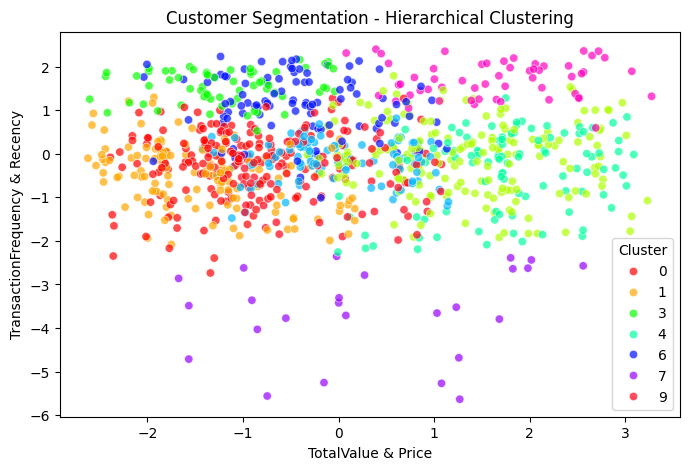

In [631]:
df_visual["Hierarchical_Cluster"] = agg_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_visual, x=pc1_label, y=pc2_label, hue="Hierarchical_Cluster", palette=colors, alpha=0.7)
plt.title("Customer Segmentation - Hierarchical Clustering")
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend(title="Cluster")
plt.show()

###plotting each cluster seperately

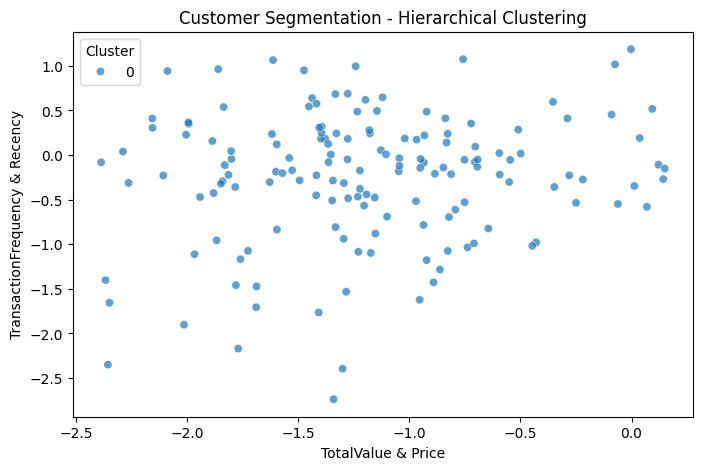

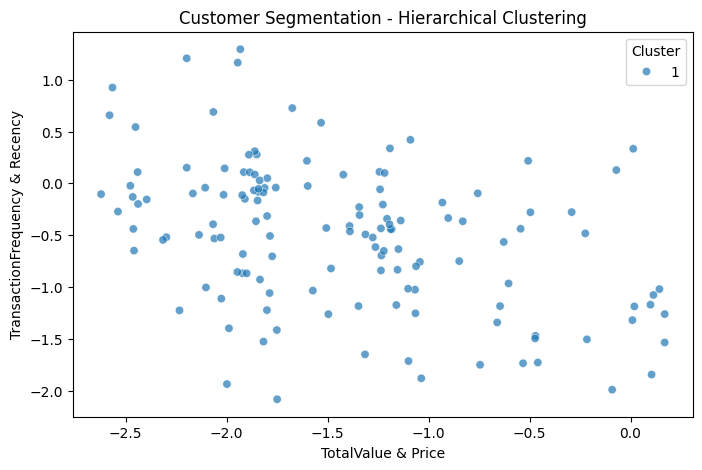

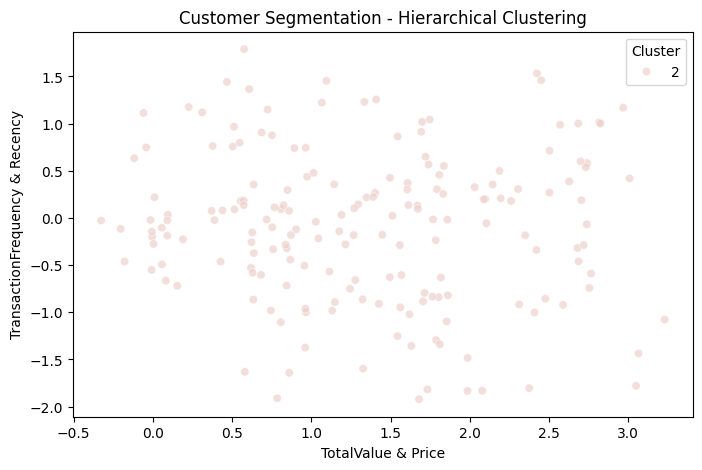

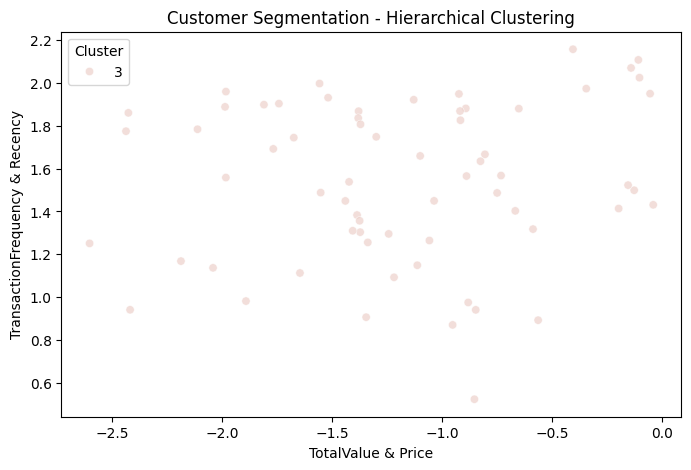

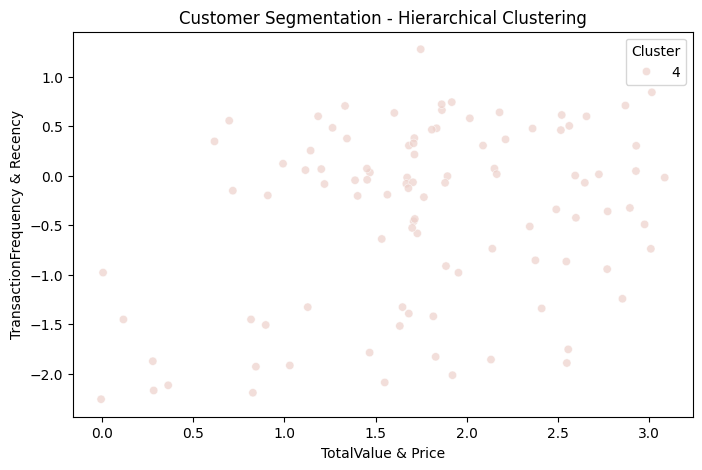

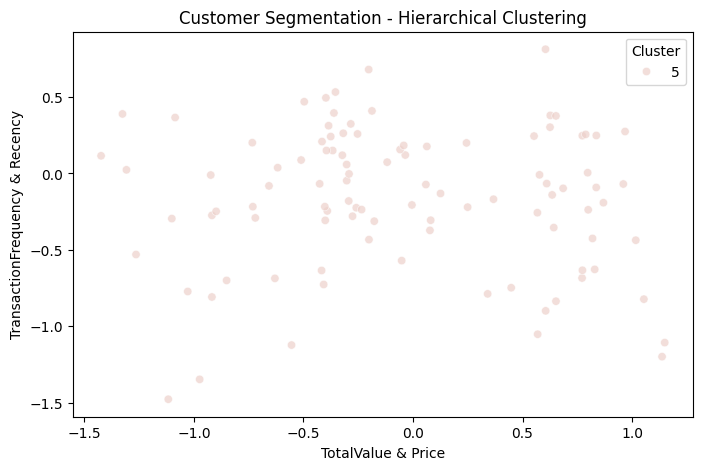

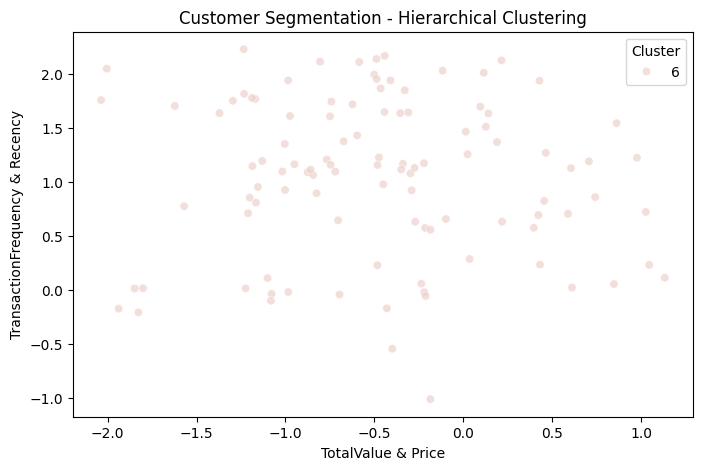

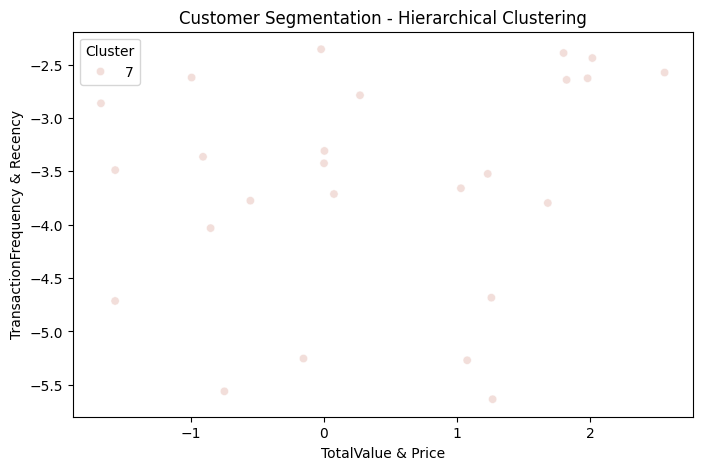

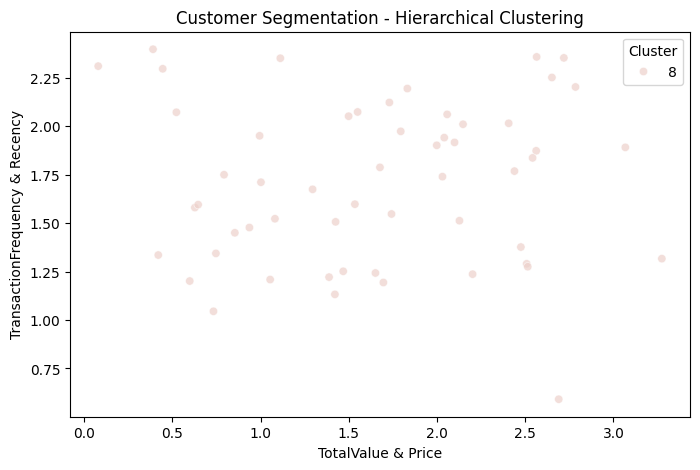

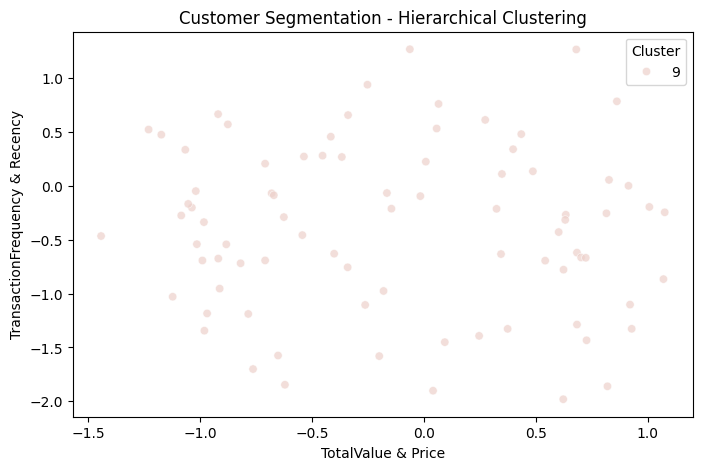

In [632]:
for i in range(10):
  df_visual["Hierarchical_Cluster"] = agg_labels
  df_selected = df_visual[df_visual["Hierarchical_Cluster"]==i]
  plt.figure(figsize=(8, 5))
  sns.scatterplot(data=df_selected, x=pc1_label, y=pc2_label, hue="Hierarchical_Cluster", alpha=0.7)
  plt.title("Customer Segmentation - Hierarchical Clustering")
  plt.xlabel(pc1_label)
  plt.ylabel(pc2_label)
  plt.legend(title="Cluster")
  plt.show()

#Conclusion

In conclusion we observe that the ideal model for this dataset is the k-means algorith with 9 clusters with
* DB Index = 0.976
* Silhouette score = 0.328